# Naive Bayes 실습

# 1. Gaussian Naive Bayes

- 데이터, 모듈 불러오기

# MarkDown
## MarkDown
### MarkDown
MarkDown
**python** is really good
-python
 - pandas
 - numpy
-  java

In [5]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

In [6]:
import pandas as pd

In [7]:
iris = datasets.load_iris()
df_X=pd.DataFrame(iris.data)
df_Y=pd.DataFrame(iris.target)

In [8]:
df_X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df_Y.head()

,0
0,0
1,0
2,0
3,0
4,0


- 모델 피팅

In [10]:
gnb=GaussianNB()
fitted=gnb.fit(iris.data, iris.target)
y_pred = fitted.predict(iris.data)

In [11]:
fitted.predict_proba(iris.data)[[1, 48, 51, 100]]

array([[1.00000000e+000, 1.51480769e-017, 2.34820051e-025],
       [1.00000000e+000, 2.63876217e-018, 2.79566024e-025],
       [7.27347795e-102, 9.45169639e-001, 5.48303606e-002],
       [3.23245181e-254, 6.35381031e-011, 1.00000000e+000]])

In [12]:
fitted.predict(iris.data)[[1, 48, 51, 100]]

array([0, 0, 1, 2])

- Confusion matrix 구하기

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
confusion_matrix(iris.target,y_pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]], dtype=int64)

- Prior 설정하기

In [16]:
gnb2 = GaussianNB(priors = [1/100, 1/100, 98/100])
fitted2 = gnb2.fit(iris.data, iris.target)
y_pred2 = fitted2.predict(iris.data)
confusion_matrix(iris.target, y_pred2)

array([[50,  0,  0],
       [ 0, 33, 17],
       [ 0,  0, 50]], dtype=int64)

In [17]:
gnb2 = GaussianNB(priors = [1/100, 98/100, 1/100])
fitted2 = gnb2.fit(iris.data, iris.target)
y_pred2 = fitted2.predict(iris.data)
confusion_matrix(iris.target, y_pred2)

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0, 14, 36]], dtype=int64)

# 2. Multinomial naive bayes

- 모듈 불러오기 및 데이터 생성

In [18]:
from sklearn.naive_bayes import MultinomialNB

In [19]:
import numpy as np

In [20]:
X = np.random.randint(5, size=(6, 100))
y = np.array([1, 2, 3, 4, 5, 6])

In [21]:
X

array([[2, 4, 4, 4, 1, 2, 3, 2, 3, 0, 1, 0, 0, 2, 0, 4, 1, 2, 4, 0, 2, 1,
        3, 2, 0, 0, 1, 1, 0, 4, 0, 4, 1, 4, 0, 4, 1, 1, 3, 0, 3, 4, 3, 0,
        3, 3, 4, 4, 0, 1, 4, 2, 3, 2, 1, 1, 4, 4, 0, 4, 1, 0, 2, 0, 3, 3,
        1, 2, 4, 4, 3, 3, 2, 4, 3, 3, 4, 2, 0, 4, 2, 4, 1, 0, 0, 1, 1, 3,
        2, 1, 1, 1, 4, 2, 3, 2, 0, 1, 1, 0],
       [3, 4, 0, 0, 4, 4, 0, 4, 1, 1, 1, 3, 4, 4, 4, 0, 3, 2, 4, 0, 3, 3,
        1, 1, 2, 3, 3, 0, 4, 2, 0, 3, 4, 4, 3, 4, 0, 3, 3, 0, 4, 0, 0, 0,
        4, 2, 4, 4, 3, 3, 0, 3, 3, 4, 0, 4, 4, 3, 3, 4, 1, 4, 2, 2, 3, 4,
        1, 3, 2, 0, 2, 2, 3, 4, 4, 2, 4, 2, 1, 1, 2, 0, 3, 4, 0, 2, 2, 3,
        4, 1, 1, 2, 4, 1, 4, 0, 3, 3, 1, 0],
       [2, 2, 4, 2, 3, 1, 1, 4, 2, 0, 1, 2, 3, 4, 4, 1, 4, 4, 4, 3, 4, 4,
        2, 0, 0, 0, 2, 1, 0, 3, 4, 2, 0, 4, 0, 2, 4, 2, 0, 3, 2, 0, 1, 3,
        1, 4, 4, 2, 3, 2, 1, 0, 3, 4, 1, 0, 3, 1, 0, 4, 2, 2, 0, 0, 2, 0,
        4, 2, 2, 4, 3, 4, 2, 1, 1, 3, 3, 3, 1, 4, 4, 2, 4, 1, 4, 1, 2, 1,
        1, 0, 0, 0, 0,

In [22]:
y

array([1, 2, 3, 4, 5, 6])

- Multinomial naive bayes 모델 생성

In [23]:
clf = MultinomialNB()
clf.fit(X, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [24]:
print(clf.predict(X[2:3]))

[3]


In [26]:
clf.predict_proba(X[2:3])

array([[1.64209245e-32, 1.44363745e-36, 1.00000000e+00, 1.46271040e-43,
        3.15027465e-31, 4.73839786e-44]])

- prior 변경해보기

In [29]:
clf2 = MultinomialNB(class_prior=[0.1, 0.1999, 0.0001, 0.1, 0.1, 0.1])
clf2.fit(X, y)

MultinomialNB(alpha=1.0, class_prior=[0.1, 0.1999, 0.0001, 0.1, 0.1, 0.1],
              fit_prior=True)

In [31]:
clf2.predict_proba(X[2:3])

array([[1.64209245e-29, 2.88583126e-33, 1.00000000e+00, 1.46271040e-40,
        3.15027465e-28, 4.73839786e-41]])

In [32]:
temp = 25.5
prob = 80.0
a = '오늘 기온 {}, 비올 확률{}'.format(temp, prob)
print(a)

오늘 기온 25.5, 비올 확률80.0


In [33]:
c = (1, 2, 3)
d = list(c)
print(d)

[1, 2, 3]


In [36]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print(a[:])
print(a[1:])
print(a[0:9:2])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 3, 5, 7, 9]


In [37]:
a = {'a' : 1, 'b' : 2, 'c'  : 3}
b = {'a' : 2, 'd' : 4, 'e' : 5, 'f' : 6}
a.update(b)
print(a)

{'a': 2, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6}


In [38]:
del a['b']
print(a)

{'a': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6}


In [39]:
c = 'b' in a
print(c)

False


In [40]:
print(a.get('d'))

4


In [41]:
c = list(a.keys())

In [42]:
print(c)

['a', 'c', 'd', 'e', 'f']


In [43]:
d = list(a.values())

In [44]:
print(d)

[2, 3, 4, 5, 6]


In [45]:
a = [1, 10, 20, 100]
for value in a:
    print(value, value*2)

1 2
10 20
20 40
100 200


In [46]:
a = [10, 20, 30, 40]
for index, value in enumerate(a):
    print(index, value)

0 10
1 20
2 30
3 40


In [52]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9]
for i in a[1:]:
    for j in a:
        print(i, "*", j, "=", i*j)

2 * 1 = 2
2 * 2 = 4
2 * 3 = 6
2 * 4 = 8
2 * 5 = 10
2 * 6 = 12
2 * 7 = 14
2 * 8 = 16
2 * 9 = 18
3 * 1 = 3
3 * 2 = 6
3 * 3 = 9
3 * 4 = 12
3 * 5 = 15
3 * 6 = 18
3 * 7 = 21
3 * 8 = 24
3 * 9 = 27
4 * 1 = 4
4 * 2 = 8
4 * 3 = 12
4 * 4 = 16
4 * 5 = 20
4 * 6 = 24
4 * 7 = 28
4 * 8 = 32
4 * 9 = 36
5 * 1 = 5
5 * 2 = 10
5 * 3 = 15
5 * 4 = 20
5 * 5 = 25
5 * 6 = 30
5 * 7 = 35
5 * 8 = 40
5 * 9 = 45
6 * 1 = 6
6 * 2 = 12
6 * 3 = 18
6 * 4 = 24
6 * 5 = 30
6 * 6 = 36
6 * 7 = 42
6 * 8 = 48
6 * 9 = 54
7 * 1 = 7
7 * 2 = 14
7 * 3 = 21
7 * 4 = 28
7 * 5 = 35
7 * 6 = 42
7 * 7 = 49
7 * 8 = 56
7 * 9 = 63
8 * 1 = 8
8 * 2 = 16
8 * 3 = 24
8 * 4 = 32
8 * 5 = 40
8 * 6 = 48
8 * 7 = 56
8 * 8 = 64
8 * 9 = 72
9 * 1 = 9
9 * 2 = 18
9 * 3 = 27
9 * 4 = 36
9 * 5 = 45
9 * 6 = 54
9 * 7 = 63
9 * 8 = 72
9 * 9 = 81


In [54]:
a = list(range(10))
print(a)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [56]:
b = list(range(10, 20))
print(b)

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [57]:
c = list(range(10, 20, 2))
print(c)

[10, 12, 14, 16, 18]


In [59]:
#while문으로 구구단
i = 2
while (i <= 9):
    j=1
    while (j <= 9):
        print("{}x{}={}".format(i, j, i*j))
        j+=1
    i+=1

2x1=2
2x2=4
2x3=6
2x4=8
2x5=10
2x6=12
2x7=14
2x8=16
2x9=18
3x1=3
3x2=6
3x3=9
3x4=12
3x5=15
3x6=18
3x7=21
3x8=24
3x9=27
4x1=4
4x2=8
4x3=12
4x4=16
4x5=20
4x6=24
4x7=28
4x8=32
4x9=36
5x1=5
5x2=10
5x3=15
5x4=20
5x5=25
5x6=30
5x7=35
5x8=40
5x9=45
6x1=6
6x2=12
6x3=18
6x4=24
6x5=30
6x6=36
6x7=42
6x8=48
6x9=54
7x1=7
7x2=14
7x3=21
7x4=28
7x5=35
7x6=42
7x7=49
7x8=56
7x9=63
8x1=8
8x2=16
8x3=24
8x4=32
8x5=40
8x6=48
8x7=56
8x8=64
8x9=72
9x1=9
9x2=18
9x3=27
9x4=36
9x5=45
9x6=54
9x7=63
9x8=72
9x9=81


In [74]:
#1-100까지 정수 중 2의 배수 또는 11의 배수 출력
a = range(1, 101)

for i in a[:99]:
    if (a[i]%2==0) or (a[i]%11==0) :
        print(a[i])
        

2
4
6
8
10
11
12
14
16
18
20
22
24
26
28
30
32
33
34
36
38
40
42
44
46
48
50
52
54
55
56
58
60
62
64
66
68
70
72
74
76
77
78
80
82
84
86
88
90
92
94
96
98
99
100


In [90]:
#리스트의 최대값과 최소값 출력
a = [-1, 0, 3, 6, 930, 2, -5, -10]
minimum = 999
maximum = -999
for i in a :
    if i+1 >= len(a):
        break
    elif a[i+1] > a[i]:
        maximum = a[i+1]
    i+=1

for i in a :
    if i+1 >= len(a):
        break
    elif a[i+1] < a[i]:
        minimum = a[i+1]
    i+=1

print(minimum, maximum)

-10 930


In [93]:
#리스트 평균값 출력
a = [1, 2, 3, 4, 5]
avg = sum(a)/len(a)
print(avg)

3.0


In [96]:
def test(*args):
    print(type(args))
    for item in args:
        print(item)

test()
test(1)
test(1, 2, 3)

<class 'tuple'>
<class 'tuple'>
1
<class 'tuple'>
1
2
3


In [97]:
square = lambda x:x**2
print(square(5))
print(type(square(5)))

25
<class 'int'>


In [98]:
a = [10, 13, 2, 3, 8, 9, 17]
b = list(map(lambda n:n%2==0, a))
print(b)

[True, False, True, False, True, False, False]


In [100]:
a = [10, 13, 2, 3, 8, 9, 17]
b = list(map(lambda n:n**2, a))
print(b)

[100, 169, 4, 9, 64, 81, 289]


In [101]:
import functools

In [103]:
a = [1, 2, 3, 4, 5]
b = functools.reduce(lambda x, y : x*y, a)
print(b)

120


In [105]:
def avg(nums):
    _sum = 0
    for i in nums:
        _sum += i
    return(_sum/len(nums))

a = range(100)
b = avg(a)
print(b)

49.5


In [106]:
class Person:
    pass
kang = Person()
print(type(kang))
print(kang)

<class '__main__.Person'>


In [110]:
a = list()
print(type(a))
print(a)

<class 'list'>
[]


In [113]:
class Person:
    def __init__(self, name, age=10):
        print(self, "is generated")
        self.name = name
        self.age = age
        self.hobby = 'guitar'
        
p1 = Person('Bob', 30)
p2 = Person('Hong', 26)
p3 = Person('Kim')
p1.hobby = 'suicide'

print(p1.name, p1.age, p1.hobby)
print(p2.name, p2.age, p2.hobby)
print(p3.name, p3.age, p3.hobby)

<__main__.Person object at 0x000002B631F32088> is generated
<__main__.Person object at 0x000002B631F32608> is generated
<__main__.Person object at 0x000002B63214EA08> is generated
Bob 30 suicide
Hong 26 guitar
Kim 10 guitar


In [114]:
class ComplexNumber:
    def __init__(self, real, img):
        self.real = real
        self.img = img
    def __str__(self):
        if self.img>=0:
            return "{} + j{}".format(self.real, self.img)
        else:
            return "{} - j{}".format(self.real, abs(self.img))
    def __add__(self, cn):
        return ComplexNumber(self.real+cn.real, self.img+cn.img)
    
    def __sub__(self, cn):
        return ComplexNumber(self.real-cn.real, self.img-cn.img)

a = ComplexNumber(1, 2)
b = ComplexNumber(2, 3)

print(a)
print(b)
print(a + b)
print(a - b)

1 + j2
2 + j3
3 + j5
-1 - j1


In [115]:
import numpy as np

In [116]:
arr = np.array(5)
arr.shape

()

In [117]:
data = np.random.randn(3, 4)

In [118]:
data

array([[ 0.90568532,  0.29603303,  1.54900324, -1.16345468],
       [ 0.90632963, -0.71807326,  1.9443243 ,  0.67102107],
       [-0.52660015,  0.22602632,  2.11796166, -1.79383549]])

In [119]:
data <= 1.0

array([[ True,  True, False,  True],
       [ True,  True, False,  True],
       [ True,  True, False,  True]])

In [120]:
data[data <= 1.0] = 0.0
data

array([[0.        , 0.        , 1.54900324, 0.        ],
       [0.        , 0.        , 1.9443243 , 0.        ],
       [0.        , 0.        , 2.11796166, 0.        ]])

In [121]:
print(type(data))

<class 'numpy.ndarray'>


In [122]:
arr = np.random.randint(2, size=27).reshape(3, 3, 3)

In [123]:
arr

array([[[0, 1, 1],
        [1, 0, 0],
        [0, 0, 0]],

       [[0, 1, 1],
        [0, 0, 1],
        [1, 0, 0]],

       [[1, 0, 0],
        [0, 1, 1],
        [0, 0, 1]]])

In [124]:
np.sum(arr)

11

In [125]:
np.max(arr)

1

In [126]:
np.min(arr)

0

In [127]:
np.mean(arr)

0.4074074074074074

In [128]:
np.argmax(arr)

1

In [129]:
np.argmin(arr)

0

In [130]:
np.unique(arr)

array([0, 1])

In [132]:
arr = np.expand_dims(arr, 0)
arr.shape

(1, 1, 3, 3, 3)

In [133]:
arr = arr.reshape(-1)
arr.shape

(27,)

In [134]:
arr = np.expand_dims(arr, -1)
arr.shape

(27, 1)

In [135]:
arr = np.expand_dims(np.expand_dims(arr, -1), 0)

In [136]:
arr.shape

(1, 27, 1, 1)

In [137]:
import matplotlib.pyplot as plt

In [138]:
%matplotlib inline

In [139]:
data = np.random.randn(50)
data

array([ 1.22227009,  0.80658179,  0.1980108 ,  1.35860514,  0.2843256 ,
        0.93930716,  0.23534018,  0.01442486, -0.09604931, -1.43232976,
       -0.23596537,  0.21907835, -0.93578169,  0.40182778, -0.27993079,
        1.17484213, -0.22804284, -0.24919105,  0.52331469, -0.59932368,
        0.313858  , -0.86079336, -0.33743654,  0.09122299, -0.56325759,
        1.01174883,  0.05041352,  0.1141043 , -2.14827544, -0.10432727,
        1.31162194, -0.85828562,  2.39505804,  1.90328553, -0.67284668,
        0.28671716, -0.43459615, -2.34405466,  0.05279817, -0.41872759,
        1.16708374,  1.26792529,  0.23864946, -0.46945714, -0.81558602,
        1.20388703, -0.03895789, -0.0732312 ,  0.00257643,  1.39028166])

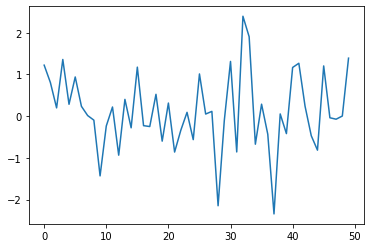

In [140]:
plt.plot(data)
plt.show()

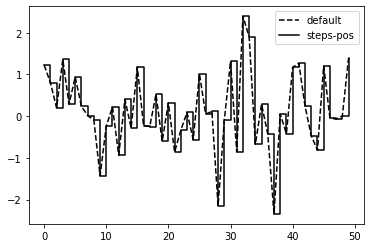

In [141]:
plt.plot(data, 'k--', label='default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-pos')
plt.legend()
plt.show()

In [142]:
import tensorflow as tf

In [143]:
from tensorflow.keras import datasets

In [144]:
mnist = datasets.mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


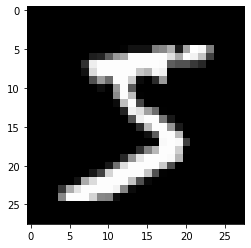

In [145]:
plt.imshow(train_x[0], 'gray')
plt.show()

In [146]:
train_y[0]

5

In [147]:
test_x.shape, test_y.shape, type(test_x[10]), type(test_y[10])

((10000, 28, 28), (10000,), numpy.ndarray, numpy.uint8)

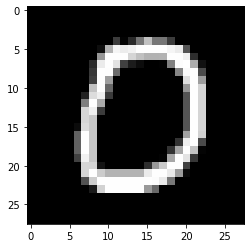

In [148]:
plt.imshow(test_x[10], 'gray')
plt.show()

In [149]:
test_y[10]

0

In [150]:
image = train_x[0:8]
image.shape

(8, 28, 28)

In [151]:
image8 = image[..., tf.newaxis]
image8.shape, type(image8)

((8, 28, 28, 1), numpy.ndarray)

In [152]:
layer = tf.keras.layers.Conv2D(filters=3, kernel_size=(3, 3), strides=(1, 1), padding='SAME', activation='relu')

In [153]:
image8.dtype

dtype('uint8')

In [154]:
image8 = tf.cast(image8, dtype=tf.float32)
output = layer(image8)
output.shape

TensorShape([8, 28, 28, 3])

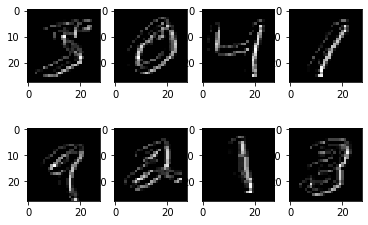

In [156]:
plt.subplot(2, 4, 1), plt.imshow(output[0,:,:,0], 'gray')
plt.subplot(2, 4, 2), plt.imshow(output[1,:,:,0], 'gray')
plt.subplot(2, 4, 3), plt.imshow(output[2,:,:,0], 'gray')
plt.subplot(2, 4, 4), plt.imshow(output[3,:,:,0], 'gray')
plt.subplot(2, 4, 5), plt.imshow(output[4,:,:,0], 'gray')
plt.subplot(2, 4, 6), plt.imshow(output[5,:,:,0], 'gray')
plt.subplot(2, 4, 7), plt.imshow(output[6,:,:,0], 'gray')
plt.subplot(2, 4, 8), plt.imshow(output[7,:,:,0], 'gray')
plt.show()

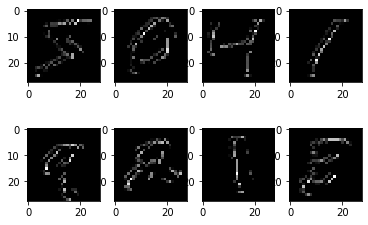

In [157]:
plt.subplot(2, 4, 1), plt.imshow(output[0,:,:,1], 'gray')
plt.subplot(2, 4, 2), plt.imshow(output[1,:,:,1], 'gray')
plt.subplot(2, 4, 3), plt.imshow(output[2,:,:,1], 'gray')
plt.subplot(2, 4, 4), plt.imshow(output[3,:,:,1], 'gray')
plt.subplot(2, 4, 5), plt.imshow(output[4,:,:,1], 'gray')
plt.subplot(2, 4, 6), plt.imshow(output[5,:,:,1], 'gray')
plt.subplot(2, 4, 7), plt.imshow(output[6,:,:,1], 'gray')
plt.subplot(2, 4, 8), plt.imshow(output[7,:,:,1], 'gray')
plt.show()

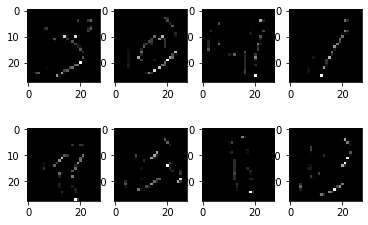

In [158]:
plt.subplot(2, 4, 1), plt.imshow(output[0,:,:,2], 'gray')
plt.subplot(2, 4, 2), plt.imshow(output[1,:,:,2], 'gray')
plt.subplot(2, 4, 3), plt.imshow(output[2,:,:,2], 'gray')
plt.subplot(2, 4, 4), plt.imshow(output[3,:,:,2], 'gray')
plt.subplot(2, 4, 5), plt.imshow(output[4,:,:,2], 'gray')
plt.subplot(2, 4, 6), plt.imshow(output[5,:,:,2], 'gray')
plt.subplot(2, 4, 7), plt.imshow(output[6,:,:,2], 'gray')
plt.subplot(2, 4, 8), plt.imshow(output[7,:,:,2], 'gray')
plt.show()

In [159]:
weight = layer.get_weights()

In [160]:
weight[0].shape, weight[1].shape

((3, 3, 1, 3), (3,))

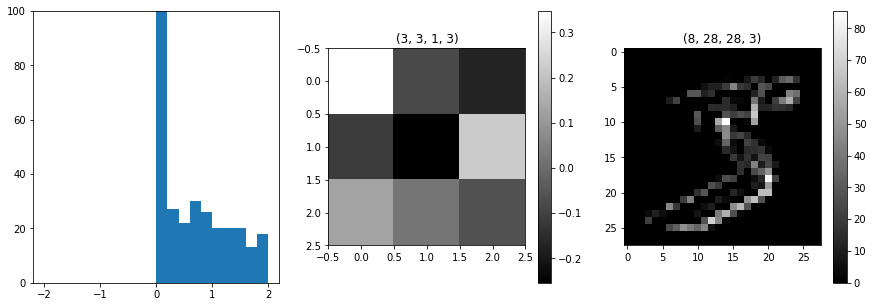

In [161]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.hist(output.numpy().ravel(), bins=20, range=[-2, 2])
plt.ylim(0, 100)
plt.subplot(132)
plt.title(weight[0].shape)
plt.imshow(weight[0][:,:,0,0], 'gray')
plt.colorbar()
plt.subplot(133)
plt.imshow(output[0,:,:,0], 'gray')
plt.title(output.shape)
plt.colorbar()
plt.show()

In [162]:
output.shape

TensorShape([8, 28, 28, 3])

In [163]:
act_layer = tf.keras.layers.ReLU()
act_output = act_layer(output)

In [164]:
pool_layer = tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (2, 2), padding = "SAME")
pool_output = pool_layer(act_output)
act_output.shape, pool_output.shape

(TensorShape([8, 28, 28, 3]), TensorShape([8, 14, 14, 3]))

In [165]:
flatten_layer = tf.keras.layers.Flatten()

In [166]:
flatten = flatten_layer(pool_output)
pool_output.shape

TensorShape([8, 14, 14, 3])

In [167]:
flatten.shape

TensorShape([8, 588])

In [168]:
flatten.numpy().ravel().shape

(4704,)

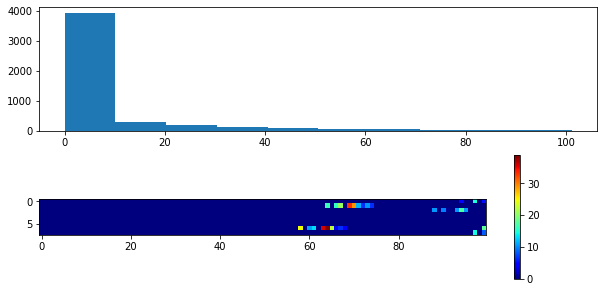

In [169]:
plt.figure(figsize=(10,5))
plt.subplot(211)
plt.hist(flatten.numpy().ravel())
plt.subplot(212)
plt.imshow(flatten[:,:100], 'jet')
plt.colorbar()
plt.show()

In [170]:
dense_layer1 = tf.keras.layers.Dense(128, activation = 'relu')
dense_output1 = dense_layer1(flatten)
dense_layer2 = tf.keras.layers.Dense(32, activation = 'relu')
dense_output2 = dense_layer2(dense_output1)
dense_layer3 = tf.keras.layers.Dense(16, activation = 'relu')
dense_output3 = dense_layer3(dense_output2)
dense_output1.shape, dense_output2.shape, dense_output3.shape

(TensorShape([8, 128]), TensorShape([8, 32]), TensorShape([8, 16]))

In [171]:
from tensorflow.keras import layers

In [172]:
input_shape = (28, 28, 1)
num_classes = 10

In [174]:
inputs = layers.Input(shape = input_shape)

cv_layer1 = layers.Conv2D(32, 3, 1, padding='SAME')
output_cv1 = cv_layer1(inputs)
cv1_act_layer = layers.Activation('relu')
output_cv1_act = cv1_act_layer(output_cv1)

cv_layer2 = layers.Conv2D(32, 3, 1, padding='SAME')
output_cv2 = cv_layer2(output_cv1_act)
cv2_act_layer = layers.Activation('relu')
output_cv2_act = cv2_act_layer(output_cv2)


In [175]:
#다음과 같이 변수명을 일치시키는게 더 효율적이다.
cv_layer = layers.Conv2D(32, 3, 1, padding='SAME')
output_cv = cv_layer(inputs)#이 부분과
cv_act_layer = layers.Activation('relu')
output_cv_act = cv_act_layer(output_cv)

cv_layer = layers.Conv2D(32, 3, 1, padding='SAME')
output_cv = cv_layer2(output_cv_act)#이 부분만 차이 나기 때문
cv_act_layer = layers.Activation('relu')
output_cv_act = cv2_act_layer(output_cv)

In [176]:
#다음과 같이 압축이 가능하다
output_cv = layers.Conv2D(32, 3, 1, padding='SAME')(inputs)
output_cv_act = layers.Activation('relu')(output_cv)

output_cv = layers.Conv2D(32, 3, 1, padding='SAME')(output_cv_act)
output_cv_act = layers.Activation('relu')(output_cv)

In [177]:
#output_cv_act도 output_cv로 통일하면 복붙에 매우 편리
output_cv = layers.Conv2D(32, 3, 1, padding='SAME')(inputs)
output_cv_act = layers.Activation('relu')(output_cv)

output_cv = layers.Conv2D(32, 3, 1, padding='SAME')(output_cv)
output_cv_act = layers.Activation('relu')(output_cv)

In [178]:
#본격적 학습
net = layers.Conv2D(32, 3, 1, padding='SAME')(inputs) #32 filters
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, 3, 1, padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2, 2))(net)
net = layers.Dropout(0.25)(net) # 25% drop out

net = layers.Conv2D(64, 3, 1, padding='SAME')(net) #64 filters
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, 3, 1, padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2, 2))(net)
net = layers.Dropout(0.25)(net) # 25% drop out

#Fully Connected
net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.25)(net)
net = layers.Dense(num_classes)(net) #마지막 dense layer는 클래스와 일치해야 함
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Test CNN')

In [179]:
#summary() - 모델 구조 보여주기
model.summary()

Model: "Test CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_8 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_9 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0  

In [180]:
#최적화 - 학습
train_x = train_x[..., tf.newaxis]
print(train_x.shape, train_y.shape)
#rescaling
train_x = train_x/255.

(60000, 28, 28, 1) (60000,)


In [181]:
np.max(train_x), np.min(train_x)

(1.0, 0.0)

In [186]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
num_epochs = 1
batch_size = 32
hist = model.fit(train_x, train_y, batch_size=batch_size, shuffle=True, epochs=num_epochs)

Train on 60000 samples
   32/60000 [..............................] - ETA: 28s

ValueError: 'Test CNN' is not a valid scope name